In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.shape, test.shape, gender.shape

((891, 12), (418, 11), (418, 2))

In [7]:
train.columns.values, test.columns.values, gender.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Survived'], dtype=object))

In [8]:
set(train.columns.values) - set(test.columns.values) - set(gender.columns.values)

set()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
gender.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [18]:
train_survived = train["Survived"].value_counts()
train_survived

0    549
1    342
Name: Survived, dtype: int64

In [19]:
train_s_rate = train_survived[1] / train_survived.sum()
train_s_rate

0.3838383838383838

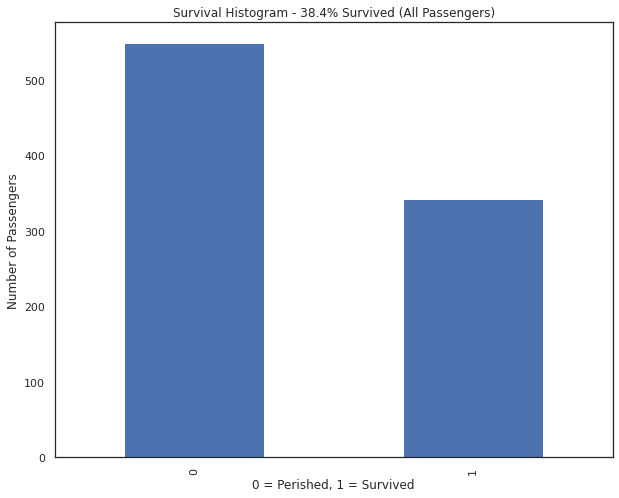

In [20]:
train_survived.plot(kind="bar")
plt.title("Survival Histogram - {:0.1%} Survived (All Passengers)".format(train_s_rate))
plt.ylabel("Number of Passengers")
plt.xlabel("0 = Perished, 1 = Survived")
plt.show()


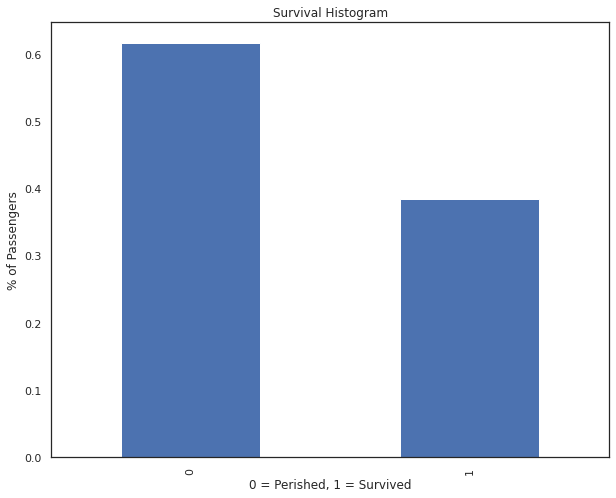

In [21]:
train["Survived"].value_counts(normalize=True).plot(kind="bar")

plt.title("Survival Histogram")
plt.ylabel("% of Passengers")
plt.xlabel("0 = Perished, 1 = Survived")

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


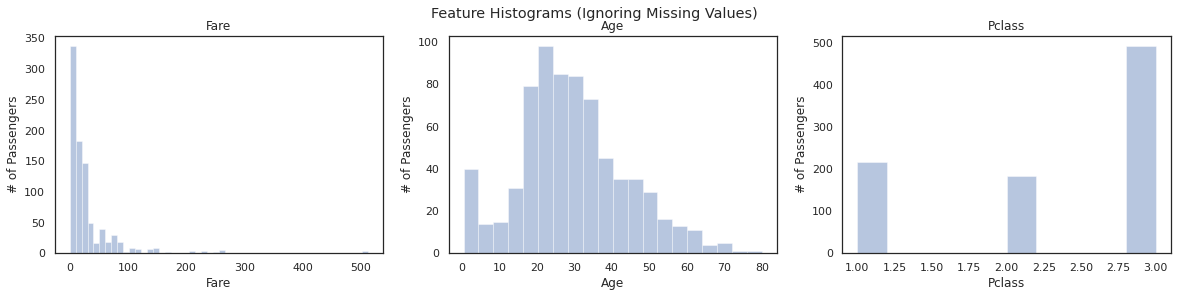

In [22]:
fig, axs = plt.subplots(1,3, figsize=(20,4))

for i, f in enumerate(["Fare", "Age", "Pclass"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)
    axs[i].set(ylabel="# of Passengers")

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

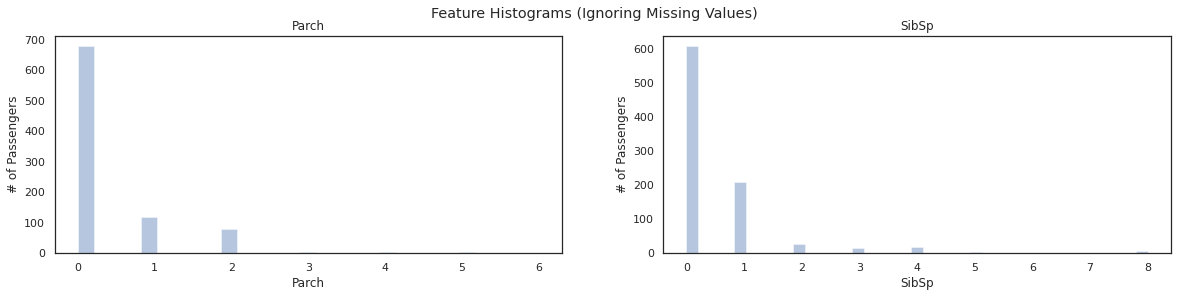

In [23]:
fig, axs = plt.subplots(1,2, figsize=(20,4))

for i, f in enumerate(["Parch", "SibSp"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)
    axs[i].set(ylabel="# of Passengers")

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()

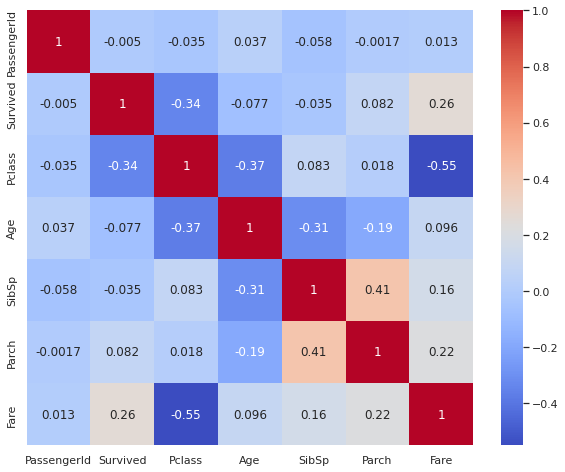

In [24]:
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [25]:
train.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

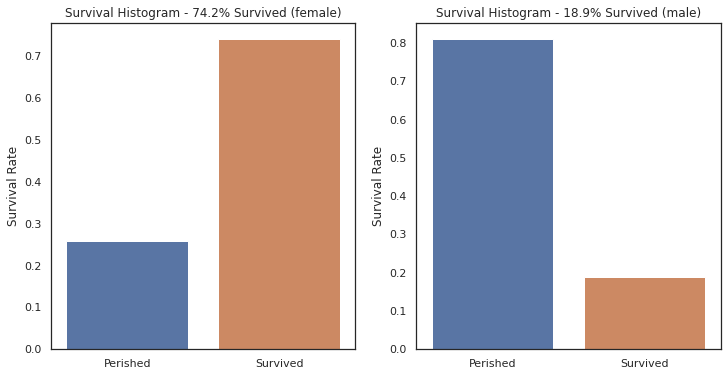

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
for i, sex in enumerate(["female", "male"]):
    p = train[train["Sex"] == sex]["Survived"].value_counts(normalize=True).sort_index().to_frame().reset_index()
    sns.barplot(x=["Perished", "Survived"], y="Survived", data=p, hue="index", ax=axs[i], dodge=False)
    axs[i].set_title("Survival Histogram - {:0.1%} Survived ({})".format(p.loc[1,"Survived"], sex))
    axs[i].set_ylabel("Survival Rate")
    axs[i].get_legend().remove()

In [27]:
sex_map = {"male": 0, "female": 1}
sex_encoded = train["Sex"].map(sex_map)

sex_df = pd.DataFrame({"Sex_Encoded": sex_encoded, "Survived": train["Survived"]})
sex_df.corr()

,Sex_Encoded,Survived
Sex_Encoded,1.000000,0.543351
Survived,0.543351,1.000000


In [28]:
n_male = len(train[train["Sex"] == "male"])
n_female = len(train[train["Sex"] == "female"])
"Males: {:.1%}, Females: {:.1%}".format(n_male / len(train), n_female / len(train))

'Males: 64.8%, Females: 35.2%'

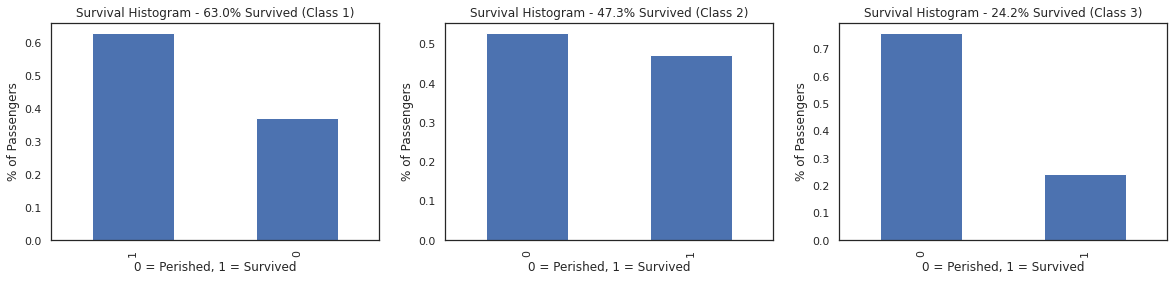

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))

for i, pclass in enumerate([1, 2, 3]):
    p = train[train["Pclass"] == pclass]["Survived"].value_counts(normalize=True)
    p.plot(kind="bar", ax=axs[i])
    axs[i].set_title("Survival Histogram - {:0.1%} Survived (Class {})".format(p[1], pclass))
    axs[i].set_ylabel("% of Passengers")
    axs[i].set_xlabel("0 = Perished, 1 = Survived")

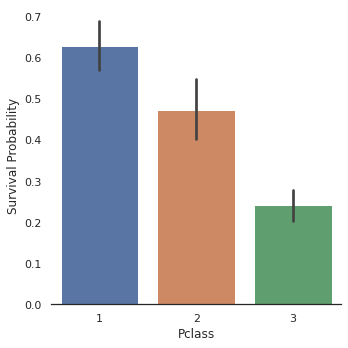

In [30]:
g = sns.catplot(x="Pclass", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

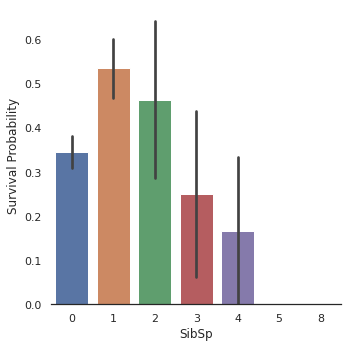

In [31]:
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

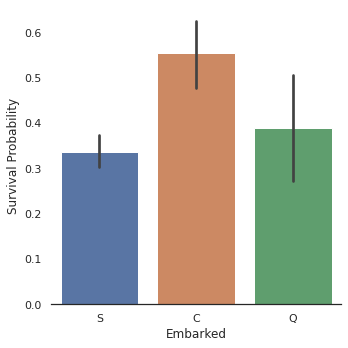

In [32]:
g = sns.catplot(x="Embarked", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


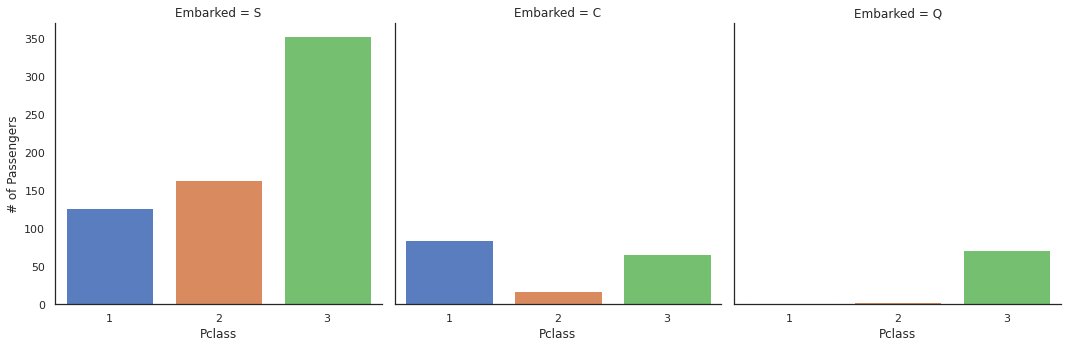

In [33]:
g = sns.catplot("Pclass", col="Embarked",  data=train, kind="count", palette="muted")
g = g.set_ylabels("# of Passengers")

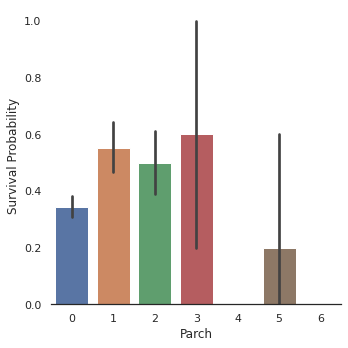

In [34]:
g = sns.catplot(x="Parch", y="Survived", data=train, kind="bar")
g.despine(left=True)
g.set_ylabels("Survival Probability")
plt.show()

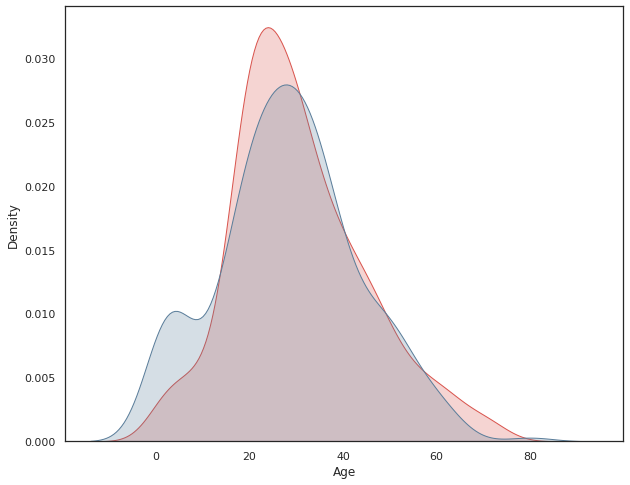

In [35]:
g = sns.kdeplot(train["Age"][train["Survived"] == 0], label="Perished", shade=True, color=sns.xkcd_rgb["pale red"])
g = sns.kdeplot(train["Age"][train["Survived"] == 1], label="Survived", shade=True, color=sns.xkcd_rgb["steel blue"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


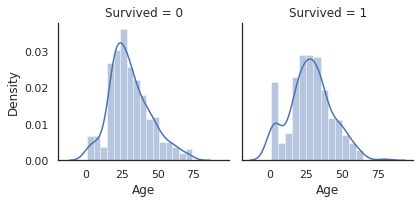

In [36]:
g = sns.FacetGrid(train, col="Survived")
g = g.map(sns.distplot, "Age")

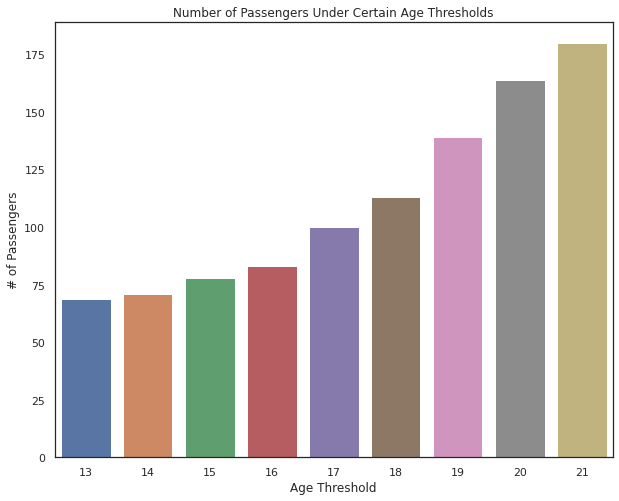

In [37]:
child_ages = [13, 14, 15, 16, 17, 18, 19, 20, 21]
num_children = []
for i in child_ages:
    num_children.append(len(train[train["Age"] < i]))
                        
g = sns.barplot(x=child_ages, y=num_children)
plt.ylabel("# of Passengers")
plt.xlabel("Age Threshold")
plt.title("Number of Passengers Under Certain Age Thresholds")
plt.show()

# Thank you 